In [2]:
#!pip install pandas seaborn scikit-learn lmfit mahotas imread
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from Functions.functions import TE_MSD,Michalet,set_size,pool_data
from sklearn.cluster import KMeans
import matplotlib as mpl
import seaborn as sns
import random

%matplotlib inline
%reload_ext autoreload

# Experimental condition
dt = 0.05

# Initial filtering
minframe=10
maxframe=40
rsquared_threshold=-1000

# Small $R_S$

In [3]:
files = ["Data/SM1/tracks135.csv","Data/SM2/tracks135.csv","Data/SM3/tracks135.csv","Data/SM4/tracks135.csv","Data/SM5/tracks135.csv","Data/SM6/tracks135.csv","Data/SM7/tracks135.csv","Data/SM8/tracks135.csv","Data/SM9/tracks135.csv","Data/SM10/tracks135.csv","Data/SM11/tracks135.csv","Data/SM12/tracks135.csv","Data/SM13/tracks135.csv"]
df135 = pool_data(files,dt,minframe,maxframe,rsquared_threshold,fit_option=5)

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  10 , maxframe =  40 , R2 threshold =  -1000
Fit option:  5
Reading filenames in  ['Data/SM1/tracks135.csv', 'Data/SM2/tracks135.csv', 'Data/SM3/tracks135.csv', 'Data/SM4/tracks135.csv', 'Data/SM5/tracks135.csv', 'Data/SM6/tracks135.csv', 'Data/SM7/tracks135.csv', 'Data/SM8/tracks135.csv', 'Data/SM9/tracks135.csv', 'Data/SM10/tracks135.csv', 'Data/SM11/tracks135.csv', 'Data/SM12/tracks135.csv', 'Data/SM13/tracks135.csv'] ...
Analysis for Data/SM1/tracks135.csv ...
92  tracks were kept out of  5305 . Done.
Analysis for Data/SM2/tracks135.csv ...
456  tracks were kept out of  31804 . Done.
Analysis for Data/SM3/tracks135.csv ...
266  tracks were kept out of  14417 . Done.
Analysis for Data/SM4/tracks135.csv ...
183  tracks were kept out of  8871 . Done.
Analysis for Data/SM5/tracks135.csv ...
30  tracks were kept out of  2558 . Done.
Analysis for Data/SM6/tracks135.csv ...
201  tracks were kept out of  12231 . Done.


# Control step: select optimal value for `minFrame` and $R^2$

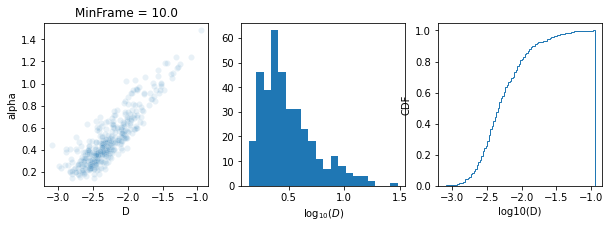

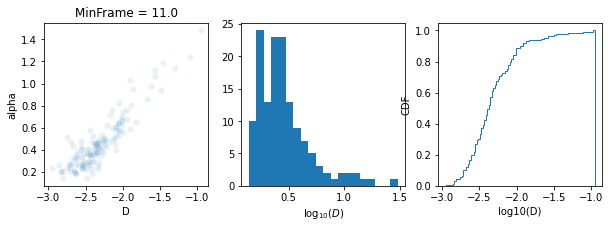

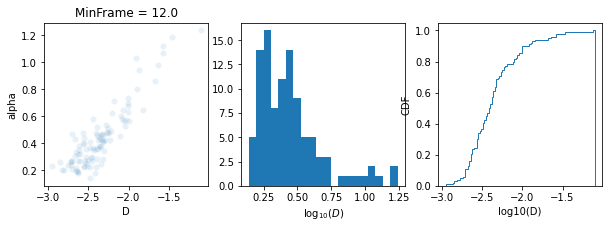

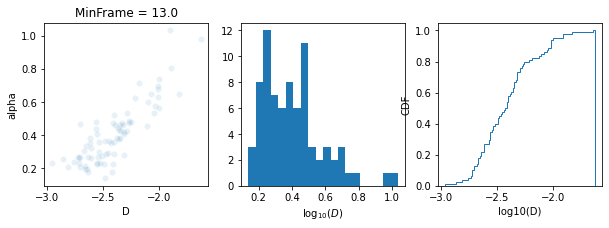

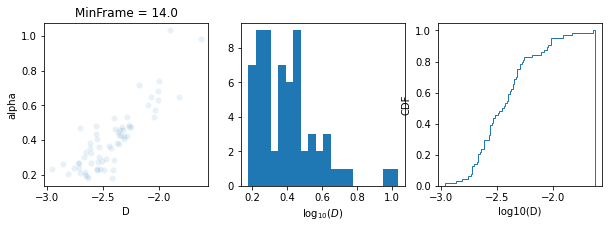

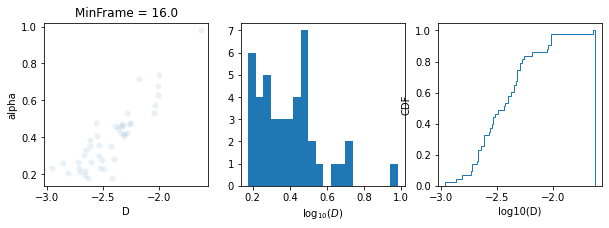

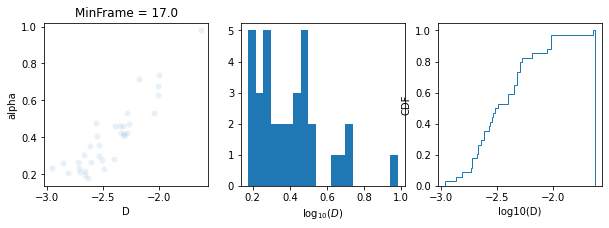

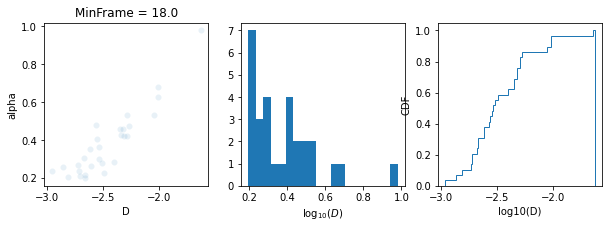

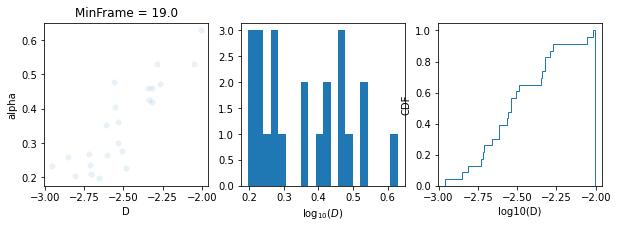

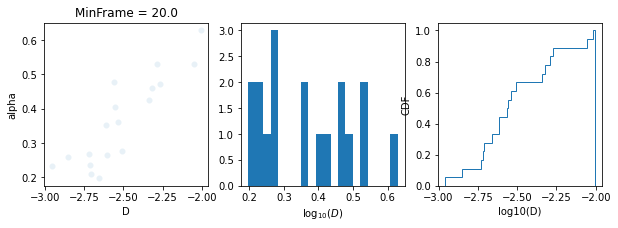

In [4]:
N = np.linspace(minframe,20,10)
for n in N:
    temp1 = df135[(df135['N']>=n) & (df135['R2']>0.5)]
    fig, ax = plt.subplots(1,3,figsize=(10,3))
    
    sns.scatterplot(x='D',y='alpha',data=temp1,ax=ax[0],alpha=0.1)
    ax[0].set_title('MinFrame = '+str(round(n)))
    
    ax[1].hist(temp1['D'],bins=20)
    ax[1].set_xlabel(r'log$_{10}(D)$')
    
    ax[2].hist(temp1['D'],bins=100,density=True, histtype='step',cumulative=True)
    ax[2].set_ylabel('CDF')
    ax[2].set_xlabel('log10(D)')

    plt.show()

# Now make your choice and see resulting scatter plot

In [8]:
df135 = df135[(df135['N']>=10) & (df135['R2']>0.5)]
df135.reset_index()
#display(df135)

,index,alpha,D,c,R2,N,x,y,MSD,Filename,spotIDs
0,0,0.543497,-2.328953,0.118108,0.993191,10,"[11.242, 11.186, 11.197000000000001, 11.222999...","[16.674, 16.664, 16.689, 16.743, 16.756, 16.77...","[0.003717555555555488, 0.0053659999999998865, ...",Data/SM1/tracks135.csv,"[308077, 309522, 312439, 310990, 315378, 31391..."
1,4,0.202923,-2.828642,0.032700,0.542329,12,"[58.902, 58.863, 58.902, 58.869, 58.905, 58.91...","[36.599000000000004, 36.596, 36.622, 36.564, 3...","[0.0031938181818179133, 0.0036638999999997106,...",Data/SM1/tracks135.csv,"[308502, 309963, 312898, 311411, 315824, 31435..."
2,11,0.270389,-2.675283,0.113575,0.649092,11,"[41.887, 41.941, 41.928999999999995, 41.92, 41...","[28.425, 28.361, 28.353, 28.331, 28.349, 28.37...","[0.003551499999999808, 0.005382222222221807, 0...",Data/SM1/tracks135.csv,"[318543, 321447, 324389, 322946, 325801, 32721..."
3,15,0.692302,-1.939880,0.350633,0.849229,10,"[42.736000000000004, 42.858999999999995, 42.82...","[43.723, 43.754, 43.846000000000004, 43.806000...","[0.0064233333333332705, 0.00860512499999993, 0...",Data/SM1/tracks135.csv,"[338994, 337607, 336151, 343394, 340483, 34193..."
4,22,0.267503,-2.538594,0.239866,0.597220,12,"[13.829, 13.775, 13.720999999999998, 13.752, 1...","[9.42, 9.318999999999999, 9.318, 9.272, 9.263,...","[0.004428545454545549, 0.008400500000000087, 0...",Data/SM1/tracks135.csv,"[365593, 366987, 374156, 369862, 371298, 36837..."
...,...,...,...,...,...,...,...,...,...,...,...
364,2063,0.269094,-2.720030,0.051897,0.624321,20,"[10.979000000000001, 11.032, 11.05099999999999...","[15.633, 15.529000000000002, 15.54099999999999...","[0.0038324736842105535, 0.0033796666666666697,...",Data/SM13/tracks135.csv,"[9636932, 9634658, 9638082, 9639181, 9640297, ..."
365,2068,1.239039,-1.099502,0.323988,0.844871,13,"[61.909, 61.847, 61.878, 61.901, 61.832, 61.88...","[10.215, 10.207, 10.119, 10.169, 10.075, 9.978...","[0.008863750000000257, 0.01609390909090928, 0....",Data/SM13/tracks135.csv,"[9714340, 9722043, 9716487, 9717601, 9719851, ..."
366,2070,0.406039,-2.747710,0.154843,0.865586,10,"[59.578, 59.573, 59.542, 59.542, 59.518, 59.53...","[53.08, 53.136, 53.141000000000005, 53.115, 53...","[0.0021356666666667843, 0.002567750000000205, ...",Data/SM13/tracks135.csv,"[9748116, 9751421, 9749779, 9752452, 9750301, ..."
367,2075,0.375989,-2.424162,0.229327,0.785482,10,"[4.363, 4.3180000000000005, 4.297, 4.36, 4.374...","[13.847999999999999, 13.863, 13.84400000000000...","[0.00465066666666662, 0.007441624999999907, 0....",Data/SM13/tracks135.csv,"[9820416, 9823686, 9822562, 9821498, 9824779, ..."


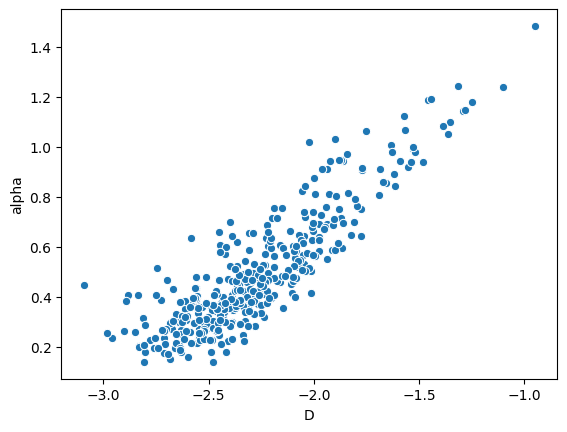

The number of points is : 369


In [9]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',data=df135)
plt.show()

MSD0 = list(df135['MSD'].values)
print("The number of points is :",len(MSD0))

# Look for bad tracks in the dataset (optional, careful, this is slow)

Monitor the T-MSD and trajectory for all of the tracks. Note down the "position in list" for the tracks that you want to discard. 

In [ ]:
alpha = list(df135['alpha'].values)
dlist = list(df135['D'].values)
X = list(df135['x'].values)
Y = list(df135['y'].values)
plt.hist(alpha,bins=20)
plt.show()
plt.hist(dlist,bins=20)
plt.show()

MSD0 = list(df135['MSD'].values)
index0 = df135.index
for i in range(len(index0)):
    #print(df135.iloc[i])
    print("position in list = ",i," index in df = ",df135.index[i])
    for msd in MSD0:
        timelag = np.linspace(dt,len(msd)*dt,len(msd))
        plt.plot(timelag,msd,c='k',alpha=0.1,linewidth=1)
    msd = MSD0[i]
    timelag = np.linspace(dt,len(msd)*dt,len(msd))
    plt.plot(timelag,msd,c='red',linewidth=3)
    plt.xscale('log')
    plt.yscale('log')
    plt.show()
    x = X[i]
    y = Y[i]
    plt.plot(x,y)
    plt.axis('equal')
    plt.show()



In [10]:
#CHANGE REMOVE WITH THE POSITIONS YOU HAVE NOTED DOWN
remove = [59,90,102,145,182,195,213,227,233,283,290,320,323]
df135 = df135.drop(df135.index[remove])
display(df135.describe())

,alpha,D,c,R2,N
count,356.000000,356.000000,356.000000,356.000000,356.000000
mean,0.497320,-2.261497,0.195800,0.757716,12.258427
std,0.242713,0.345382,0.109328,0.144992,3.616171
min,0.139809,-2.956415,0.010525,0.500972,10.000000
25%,0.320423,-2.504764,0.112997,0.625521,10.000000
50%,0.435132,-2.319371,0.183654,0.770979,11.000000
75%,0.616014,-2.055865,0.251952,0.879644,13.000000
max,1.484002,-0.950850,0.661387,0.995459,35.000000


Compute the TE-MSD and ensemble variance...


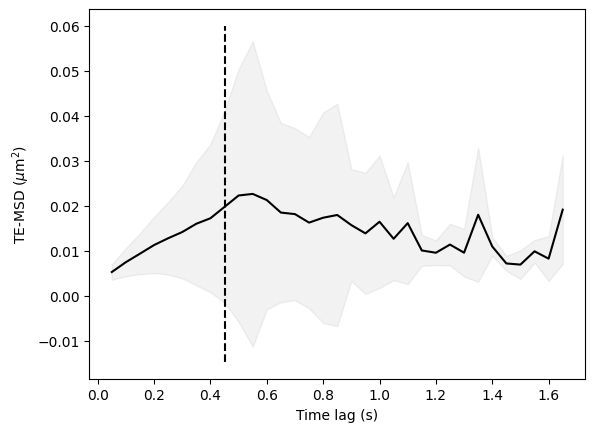

You have set a cutoff at  0.45  s...
Done. The TE-MSD and associated variance have been generated.


In [11]:
MSDtot = list(df135['MSD'].values)
temsdtot,vartot,timelagtot = TE_MSD(MSDtot,cutoff=0.45)

#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  356
Number of T-MSDs at time lag  0.1  =  356
Number of T-MSDs at time lag  0.15  =  356
Number of T-MSDs at time lag  0.2  =  356
Number of T-MSDs at time lag  0.25  =  356
Number of T-MSDs at time lag  0.3  =  356
Number of T-MSDs at time lag  0.35  =  356
Number of T-MSDs at time lag  0.4  =  356
Number of T-MSDs at time lag  0.45  =  356
Number of T-MSDs at time lag  0.5  =  207
Number of T-MSDs at time lag  0.55  =  139
Number of T-MSDs at time lag  0.6  =  99
Number of T-MSDs at time lag  0.65  =  76
Number of T-MSDs at time lag  0.7  =  62
Number of T-MSDs at time lag  0.75  =  43
Number of T-MSDs at time lag  0.8  =  34
Number of T-MSDs at time lag  0.85  =  29
Number of T-MSDs at time lag  0.9  =  23
Number of T-MSDs at time lag  0.95  =  18
Number of T-MSDs a

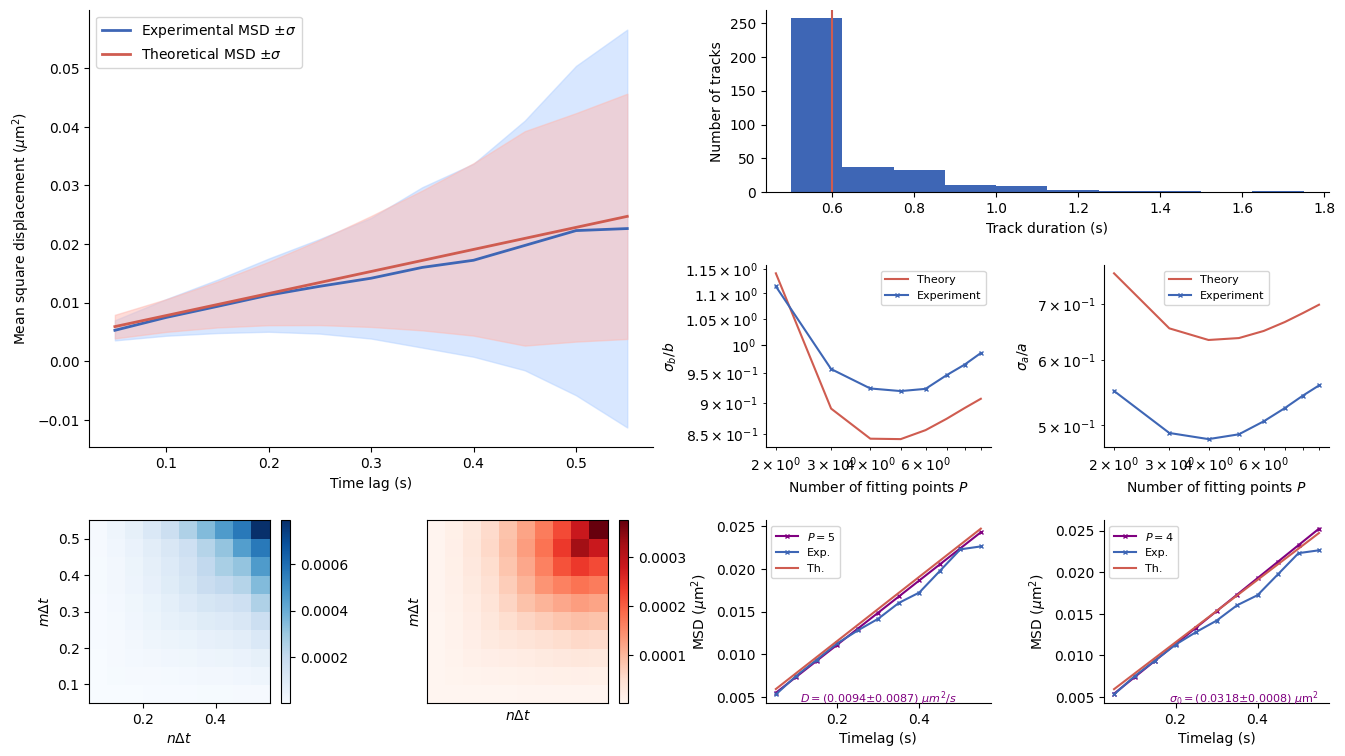

/home/remy13127/Documents/Internship/Functions/functions.py:1039: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


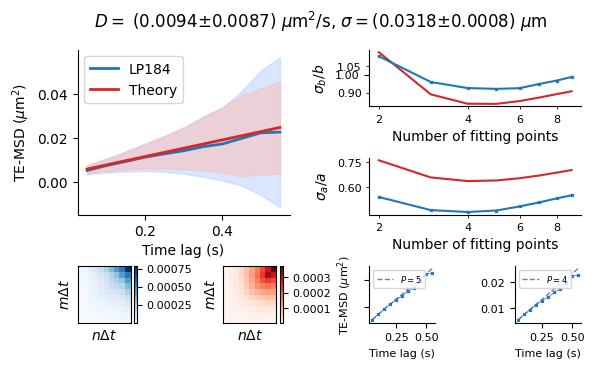

In [12]:
Michalet(MSDtot,cutoff=0.6,experiment_name=r'LP184')
plt.savefig('Results/michalet_lp184_rs135.pdf',bbox_inches = 'tight')
plt.show()

In [14]:
display(df135.describe())
print("Number of tracks = ",df135.shape[0])
index = list(df135.index)
label = []
for idx in index:
    label.append('slow_pop135')
df135['Label']=label
display(df135)

,alpha,D,c,R2,N
count,356.000000,356.000000,356.000000,356.000000,356.000000
mean,0.497320,-2.261497,0.195800,0.757716,12.258427
std,0.242713,0.345382,0.109328,0.144992,3.616171
min,0.139809,-2.956415,0.010525,0.500972,10.000000
25%,0.320423,-2.504764,0.112997,0.625521,10.000000
50%,0.435132,-2.319371,0.183654,0.770979,11.000000
75%,0.616014,-2.055865,0.251952,0.879644,13.000000
max,1.484002,-0.950850,0.661387,0.995459,35.000000


Number of tracks =  356


,alpha,D,c,R2,N,x,y,MSD,Filename,spotIDs,Label
0,0.543497,-2.328953,0.118108,0.993191,10,"[11.242, 11.186, 11.197000000000001, 11.222999...","[16.674, 16.664, 16.689, 16.743, 16.756, 16.77...","[0.003717555555555488, 0.0053659999999998865, ...",Data/SM1/tracks135.csv,"[308077, 309522, 312439, 310990, 315378, 31391...",slow_pop135
4,0.202923,-2.828642,0.032700,0.542329,12,"[58.902, 58.863, 58.902, 58.869, 58.905, 58.91...","[36.599000000000004, 36.596, 36.622, 36.564, 3...","[0.0031938181818179133, 0.0036638999999997106,...",Data/SM1/tracks135.csv,"[308502, 309963, 312898, 311411, 315824, 31435...",slow_pop135
11,0.270389,-2.675283,0.113575,0.649092,11,"[41.887, 41.941, 41.928999999999995, 41.92, 41...","[28.425, 28.361, 28.353, 28.331, 28.349, 28.37...","[0.003551499999999808, 0.005382222222221807, 0...",Data/SM1/tracks135.csv,"[318543, 321447, 324389, 322946, 325801, 32721...",slow_pop135
15,0.692302,-1.939880,0.350633,0.849229,10,"[42.736000000000004, 42.858999999999995, 42.82...","[43.723, 43.754, 43.846000000000004, 43.806000...","[0.0064233333333332705, 0.00860512499999993, 0...",Data/SM1/tracks135.csv,"[338994, 337607, 336151, 343394, 340483, 34193...",slow_pop135
22,0.267503,-2.538594,0.239866,0.597220,12,"[13.829, 13.775, 13.720999999999998, 13.752, 1...","[9.42, 9.318999999999999, 9.318, 9.272, 9.263,...","[0.004428545454545549, 0.008400500000000087, 0...",Data/SM1/tracks135.csv,"[365593, 366987, 374156, 369862, 371298, 36837...",slow_pop135
...,...,...,...,...,...,...,...,...,...,...,...
2063,0.269094,-2.720030,0.051897,0.624321,20,"[10.979000000000001, 11.032, 11.05099999999999...","[15.633, 15.529000000000002, 15.54099999999999...","[0.0038324736842105535, 0.0033796666666666697,...",Data/SM13/tracks135.csv,"[9636932, 9634658, 9638082, 9639181, 9640297, ...",slow_pop135
2068,1.239039,-1.099502,0.323988,0.844871,13,"[61.909, 61.847, 61.878, 61.901, 61.832, 61.88...","[10.215, 10.207, 10.119, 10.169, 10.075, 9.978...","[0.008863750000000257, 0.01609390909090928, 0....",Data/SM13/tracks135.csv,"[9714340, 9722043, 9716487, 9717601, 9719851, ...",slow_pop135
2070,0.406039,-2.747710,0.154843,0.865586,10,"[59.578, 59.573, 59.542, 59.542, 59.518, 59.53...","[53.08, 53.136, 53.141000000000005, 53.115, 53...","[0.0021356666666667843, 0.002567750000000205, ...",Data/SM13/tracks135.csv,"[9748116, 9751421, 9749779, 9752452, 9750301, ...",slow_pop135
2075,0.375989,-2.424162,0.229327,0.785482,10,"[4.363, 4.3180000000000005, 4.297, 4.36, 4.374...","[13.847999999999999, 13.863, 13.84400000000000...","[0.00465066666666662, 0.007441624999999907, 0....",Data/SM13/tracks135.csv,"[9820416, 9823686, 9822562, 9821498, 9824779, ...",slow_pop135


# PLOT FOR REPORT

/home/remy13127/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


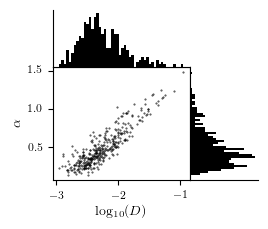

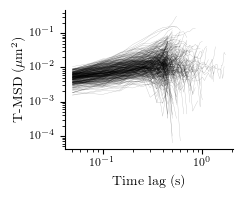

In [15]:
# the random data
logD = list(df135['D'].values)
alpha = list(df135['alpha'].values)
binsize=50

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.55))
grid = plt.GridSpec(3, 3, wspace=0., hspace=0.,right=0.7)
scatter = fig.add_subplot(grid[1:3, 0:2])
hist_logD = fig.add_subplot(grid[0,0:2],yticks=[],xticks=[])
hist_alpha = fig.add_subplot(grid[1:3,2],yticks=[],xticks=[])

scatter.scatter(logD,alpha,s=0.2,c='k',alpha=0.8)
scatter.set_xlabel(r'log$_{10}(D)$')
scatter.set_ylabel(r'$\alpha$')

hist_logD.hist(logD,bins=binsize,color='k')
hist_logD.spines['top'].set_visible(False)
hist_logD.spines['right'].set_visible(False)


hist_alpha.hist(alpha,bins=binsize,color='k',orientation='horizontal')
hist_alpha.spines['top'].set_visible(False)
hist_alpha.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Results/scatter_rs135_lp184.pdf',bbox_inches = 'tight')
plt.show()

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0., hspace=0.,right=0.7)
ax = fig.add_subplot(grid[0,0])
MSDSeries = list(df135['MSD'].values)
for msd in MSDSeries:
    timelag = np.linspace(dt,len(msd)*dt,len(msd))
    ax.plot(timelag,msd,c='k',alpha=0.3,linewidth=0.2)
ax.set_xscale('log')
ax.set_yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Time lag (s)')
ax.set_ylabel(r'T-MSD ($\mu$m$^2$)')
plt.savefig('Results/msd_rs135_lp184.pdf',bbox_inches = 'tight')
plt.show()

30 30
[0.01007588]


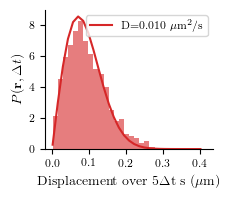

In [16]:
Xtot = list(df135['x'].values)
Ytot = list(df135['y'].values)

def plot_dist(X,Y,n,binsize=30,color='tab:blue'):
    displacements = []
    epsilon=0.
    s = 0
    for x,y in zip(X,Y):
        for i in range(0,len(x)-n):
            disp = np.sqrt((x[n+i] - x[i])**2 + (y[n+i] - y[i])**2)
            displacements.append(disp)

    from scipy.optimize import curve_fit
    def prob(d,D):
        timelag=dt*n
        return(2*d/(4*D*timelag+epsilon)*np.exp(-d**2/(4*D*timelag+epsilon)))

    histo,bins = np.histogram(displacements,bins=binsize,density=True)
    print(len(histo),len(bins[:-1]))
    popt, pcov = curve_fit(prob, bins[:-1], histo)
    print(popt)
    plt.plot(bins[:-1], prob(bins[:-1], *popt), 'r-',label=r'D=%5.3f $\mu$m$^2/$s' % tuple(popt),c=color)
    plt.hist(displacements,bins=binsize,density=True,color=color,alpha=0.6)

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0., hspace=0.,right=0.7)
ax = fig.add_subplot(grid[0,0])
n=5
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plot_dist(Xtot,Ytot,n,color='tab:red',binsize=30)
ax.set_xlabel(r'Displacement over '+str(n)+'$\Delta$t s ($\mu$m)')
ax.set_ylabel(r'$P(\mathbf{r},\Delta t)$')
ax.legend()
plt.savefig('Results/lp184_rs135_displacement'+str(n)+'.pdf',bbox_inches = 'tight')
plt.show()

# Identify the tracks in the dataset associated to the larger $R_S$

In [17]:
files = ["Data/SM1/tracks425.csv","Data/SM2/tracks425.csv","Data/SM3/tracks425.csv","Data/SM4/tracks425.csv","Data/SM5/tracks425.csv","Data/SM6/tracks425.csv","Data/SM7/tracks425.csv","Data/SM8/tracks425.csv","Data/SM9/tracks425.csv","Data/SM10/tracks425.csv"]
df425 = pool_data(files,dt,minframe,maxframe,rsquared_threshold,fit_option=5,display_id=False)

Parameters for the MSD analysis: dt =  0.05
Initial filters: minframe =  10 , maxframe =  40 , R2 threshold =  -1000
Fit option:  5
Reading filenames in  ['Data/SM1/tracks425.csv', 'Data/SM2/tracks425.csv', 'Data/SM3/tracks425.csv', 'Data/SM4/tracks425.csv', 'Data/SM5/tracks425.csv', 'Data/SM6/tracks425.csv', 'Data/SM7/tracks425.csv', 'Data/SM8/tracks425.csv', 'Data/SM9/tracks425.csv', 'Data/SM10/tracks425.csv'] ...
Analysis for Data/SM1/tracks425.csv ...
609  tracks were kept out of  27614 . Done.
Analysis for Data/SM2/tracks425.csv ...
1971  tracks were kept out of  84248 . Done.
Analysis for Data/SM3/tracks425.csv ...
1513  tracks were kept out of  59395 . Done.
Analysis for Data/SM4/tracks425.csv ...
990  tracks were kept out of  42043 . Done.
Analysis for Data/SM5/tracks425.csv ...
31  tracks were kept out of  2757 . Done.
Analysis for Data/SM6/tracks425.csv ...
758  tracks were kept out of  44032 . Done.
Analysis for Data/SM7/tracks425.csv ...
540  tracks were kept out of  24033 

# Identify trajectories already detected at 135 nm and put label

In [19]:
def radius(xlist,ylist):
    rad=[]
    for x,y in zip(xlist,ylist):
        r=[]
        for i in range(len(x)):
            xx = x[i]
            yy = y[i]
            r.append(np.sqrt(xx**2+yy**2))
        rad.append(r)
    return(rad)

X425 = list(df425['x'].values)
Y425 = list(df425['y'].values)
R425 = radius(X425,Y425)

X135 = list(df135['x'].values)
Y135 = list(df135['y'].values)
R135 = radius(X135,Y135)

filenames425 = list(df425['Filename'].values)
filenames135 = list(df135['Filename'].values)

spots135 = list(df135['spotIDs'].values)
spots425 = list(df425['spotIDs'].values)

label135 = list(df135['Label'].values)
label425 = ['nan' for k in range(len(X425))]  #label provisoire, nan

def is_proper_subset(set, superset):
     return all(x in superset for x in set) and len(set)<=len(superset)
    
sum0 = 0   
list_length = []
for i in range(len(R135)):
    for j in range(len(R425)):
        if filenames135[i][:10]==filenames425[j][:10]:
            test = np.any(np.intersect1d(spots135[i], spots425[j])) #is_proper_subset(spots135[i],spots425[j])
            if test==True:
                list_length.append(len(R425[j])-len(R135[i]))
                #plt.plot(X135[i],Y135[i],label='135',linewidth=3,color='tab:orange')
                #plt.plot(X425[j],Y425[j],label='425',linewidth=1,color='tab:blue')
                #plt.legend()
                #plt.axis('equal')
                #plt.show()
                label425[j] = '135'
                sum0+=1
print("Number of tracks in 135nm dataset = ",len(label135)," Number of matches = ",sum0)
dflabel = df425
dflabel['Label']=label425
display(dflabel)

Number of tracks in 135nm dataset =  356  Number of matches =  236


,alpha,D,c,R2,N,x,y,MSD,Filename,spotIDs,Label
0,0.323623,-1.714805,0.328146,0.660750,10,"[55.578, 55.521, 55.488, 55.595, 55.56, 55.525...","[6.7989999999999995, 6.971, 7.056, 6.944, 6.94...","[0.026161444444445084, 0.045406500000000724, 0...",Data/SM1/tracks425.csv,"[312232, 310789, 315177, 313704, 319527, 31657...",nan
1,0.501176,-1.367566,0.240288,0.231690,10,"[43.5, 43.527, 43.54, 43.538000000000004, 43.7...","[42.637, 42.523999999999994, 42.49800000000000...","[0.029299888888888778, 0.07181662499999944, 0....",Data/SM1/tracks425.csv,"[308661, 310124, 313061, 311553, 315963, 31449...",nan
2,0.907830,-0.692106,0.333116,0.967444,10,"[41.879, 41.938, 41.886, 41.971000000000004, 4...","[43.082, 43.0, 43.099, 43.041000000000004, 43....","[0.049542888888888116, 0.11150899999999905, 0....",Data/SM1/tracks425.csv,"[308674, 310145, 313071, 311571, 315978, 31450...",nan
3,1.008992,-1.043242,0.250428,0.891811,13,"[39.925, 40.13, 40.078, 40.175, 40.076, 40.076...","[32.649, 32.662, 32.667, 32.594, 32.685, 32.68...","[0.019787833333333265, 0.02970581818181801, 0....",Data/SM1/tracks425.csv,"[308401, 309874, 312802, 311325, 315723, 31426...",nan
4,0.140008,-2.060255,0.206190,-0.082927,16,"[48.501000000000005, 48.423, 48.38800000000000...","[43.708, 43.615, 43.62, 43.553999999999995, 43...","[0.02041900000000043, 0.03441042857142931, 0.0...",Data/SM1/tracks425.csv,"[308697, 310159, 313085, 311581, 315995, 31452...",nan
...,...,...,...,...,...,...,...,...,...,...,...
8337,0.302554,-2.335173,0.022022,0.417318,10,"[18.164, 18.13, 18.213, 18.152, 18.148, 18.078...","[13.802999999999999, 13.831, 13.87, 13.89, 13....","[0.007555444444444372, 0.0078102500000001, 0.0...",Data/SM10/tracks425.csv,"[5967609, 5968756, 5969904, 5971105, 5972207, ...",nan
8338,0.302092,-2.855042,0.028381,-6.572194,22,"[10.932, 10.931, 10.93, 10.966, 10.96099999999...","[57.755, 57.747, 57.735, 57.742, 57.7889999999...","[0.002179761904761806, 0.0025925499999998477, ...",Data/SM10/tracks425.csv,"[5971820, 5972921, 5975188, 5974063, 5976360, ...",nan
8339,0.196398,-2.310609,0.073955,0.551284,11,"[13.908, 13.955, 14.044, 13.909, 14.003, 13.97...","[64.967, 64.941, 65.064, 65.03699999999999, 65...","[0.010493299999999343, 0.013392111111110385, 0...",Data/SM10/tracks425.csv,"[5991687, 5993966, 5993836, 5996307, 5995147, ...",nan
8340,0.100000,-2.875222,0.144310,-0.097693,11,"[17.141, 17.142, 17.194000000000003, 17.132, 1...","[14.385, 14.388, 14.345999999999998, 14.415999...","[0.005817800000000059, 0.0032873333333333955, ...",Data/SM10/tracks425.csv,"[6018571, 6019749, 6020984, 6022154, 6023274, ...",nan


# Plot the histogram of the difference of track length for the matches

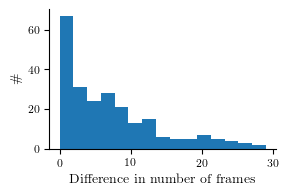

In [20]:
mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0.5, hspace=0.1)
ax = fig.add_subplot(grid[0,0])
ax.hist(list_length,bins=15)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Difference in number of frames')
ax.set_ylabel('$\#$')
plt.savefig('Results/histogram_135_to_425_lp184.pdf',bbox_inches = 'tight')
plt.show()

# Plots to control the deformation of the scatter plot caused by the change in search radius

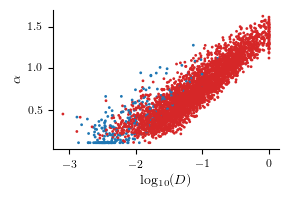

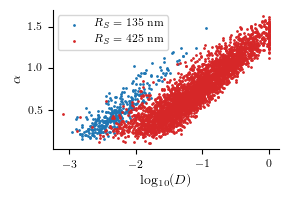

In [21]:
r2 = 0.5
labels1 = list(dflabel['Label'][(dflabel['Label']!='nan') | (dflabel['R2']>r2)].values)
rgb = ['tab:red' if x=='nan' else 'tab:blue' for x in labels1]
#rgb = ['#f9ab9d' if x=='nan' else 'tab:blue' if x=='slow_pop' else 'tab:orange' for x in labels1]
labelplot = ['No match' if x=='nan' else 'Slow population' if x=='slow_pop' else 'Fast population' for x in labels1]
D1 = list(dflabel['D'][(dflabel['Label']!='nan') | (dflabel['R2']>r2)].values)
alpha1 = list(dflabel['alpha'][(dflabel['Label']!='nan') | (dflabel['R2']>r2)].values)

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0.5, hspace=0.1)
ax = fig.add_subplot(grid[0,0])

ax.scatter(D1,alpha1,color=rgb,s=1,alpha=1)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'log$_{10}(D)$')
ax.set_ylabel(r'$\alpha$')
plt.savefig('Results/scatter_425_id.pdf',bbox_inches = 'tight')
plt.show()

label135 = list(df135['Label'].values)
D425 = list(dflabel['D'][(dflabel['Label']=='nan') & (dflabel['R2']>r2)].values)
alpha425 = list(dflabel['alpha'][(dflabel['Label']=='nan') & (dflabel['R2']>r2)].values)
D135 = list(df135['D'].values)
alpha135 = list(df135['alpha'].values)

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0.5, hspace=0.1)
ax = fig.add_subplot(grid[0,0])
ax.scatter(D135,alpha135,color='tab:blue',s=1,alpha=1,label=r'$R_S = 135$ nm')
ax.scatter(D425,alpha425,color='tab:red',s=1,alpha=1,label=r'$R_S = 425$ nm')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel(r'log$_{10}(D)$')
ax.set_ylabel(r'$\alpha$')
ax.legend()
plt.savefig('Results/scatter_425and135_id.pdf',bbox_inches = 'tight')
plt.show()

# Save in `data_done` the tracks that have been classified and remove them from the dataset `data_stripped` in order to classify the other tracks now

In [22]:
data_done = dflabel[(dflabel['Label'] != 'nan')].copy()
index = dflabel[(dflabel['Label'] != 'nan')].index
temp = dflabel.copy()
data_stripped = temp.drop(index)

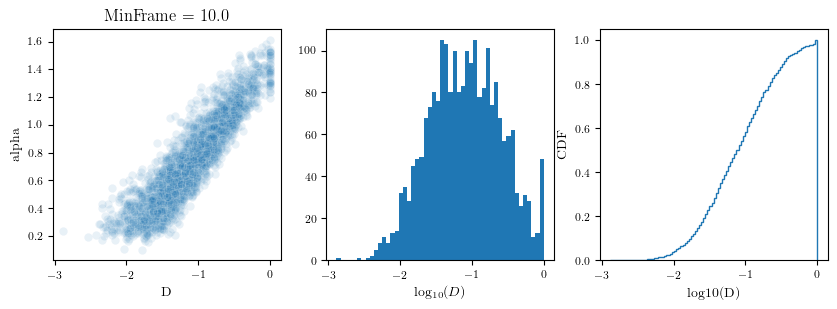

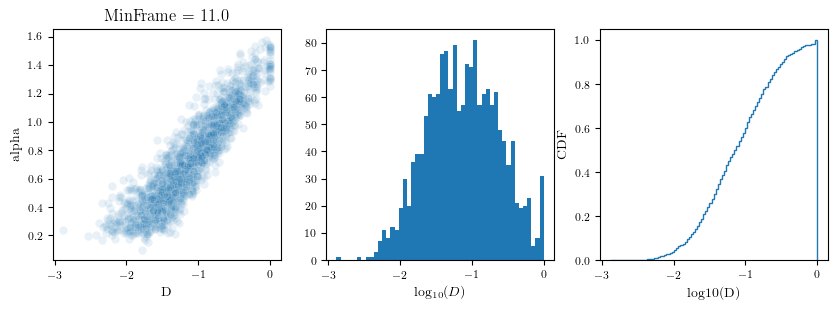

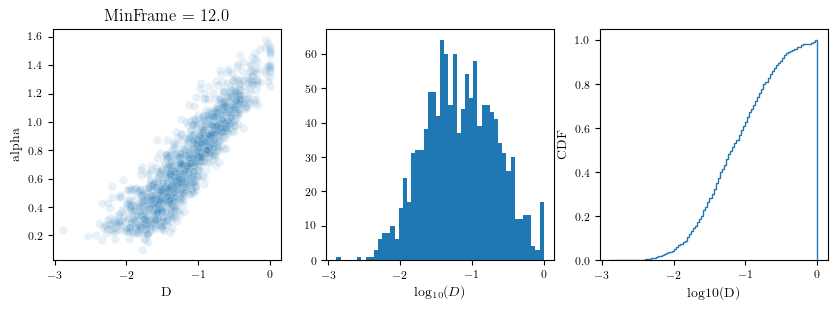

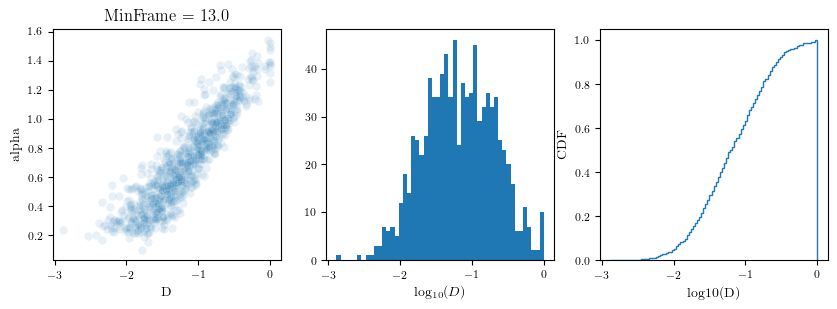

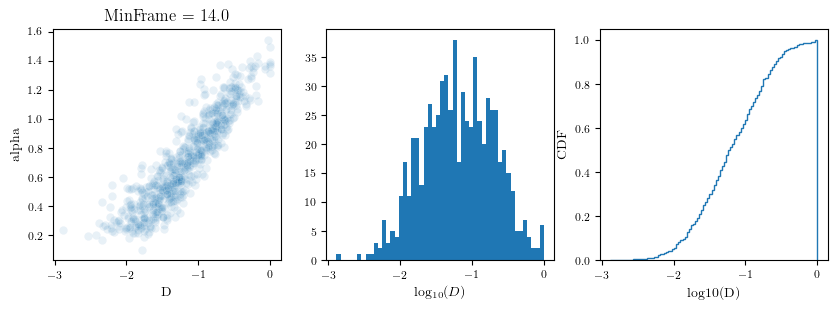

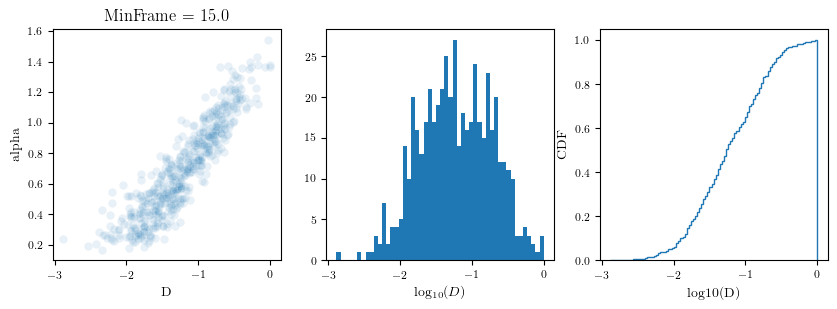

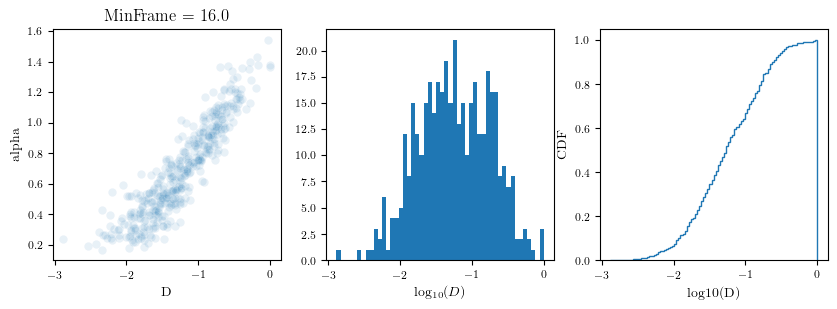

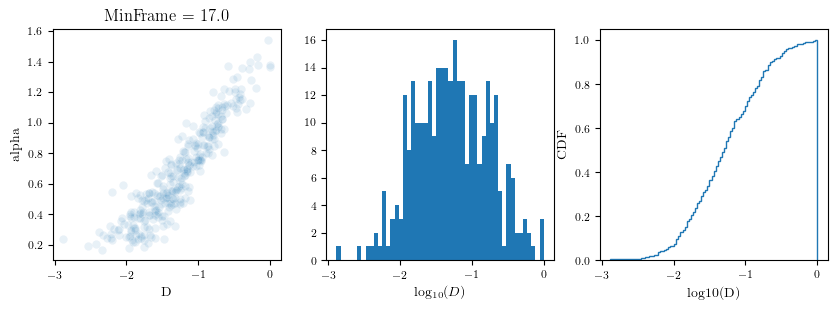

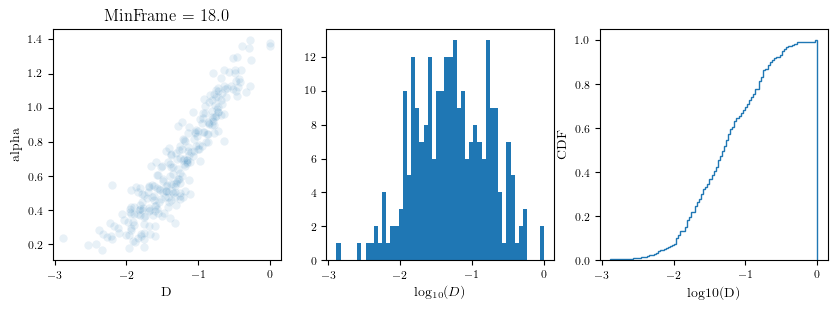

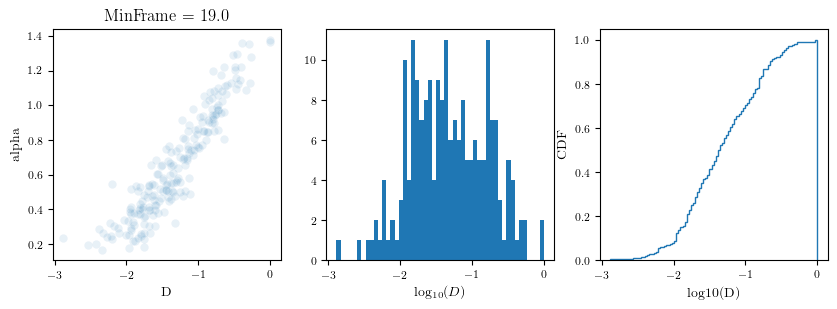

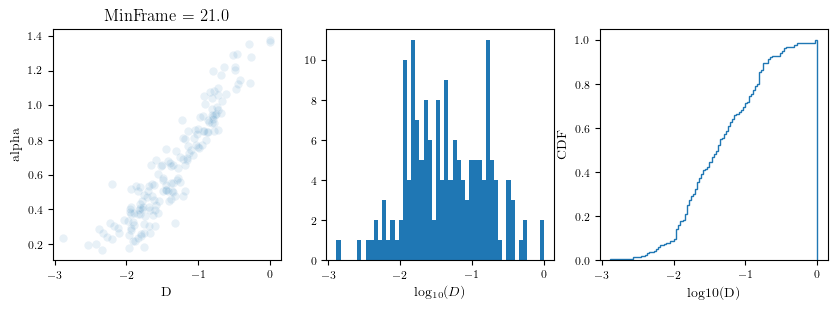

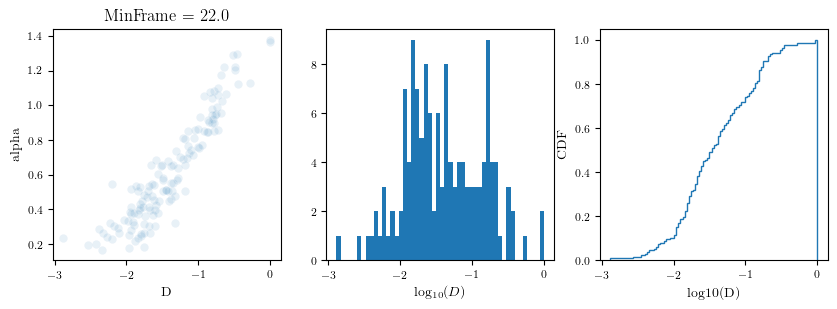

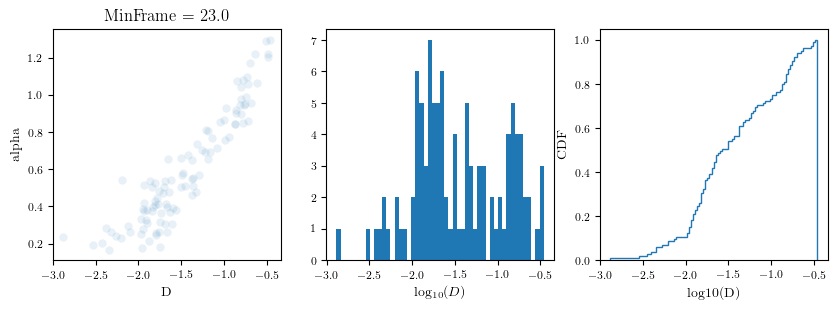

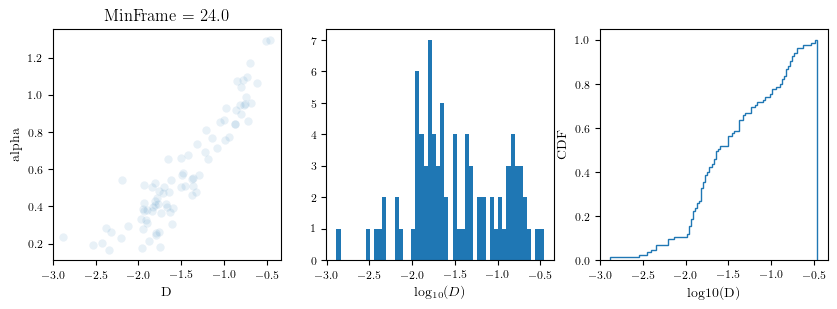

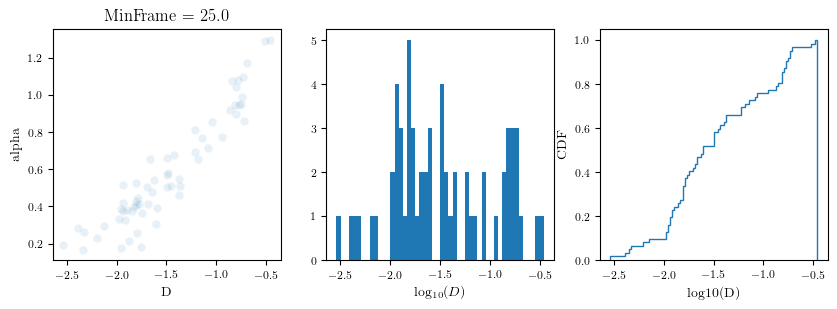

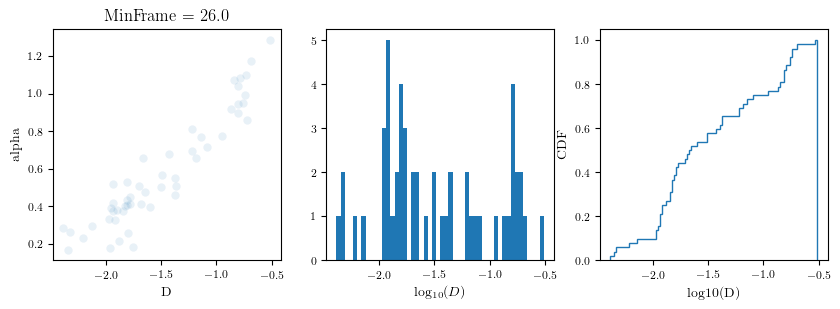

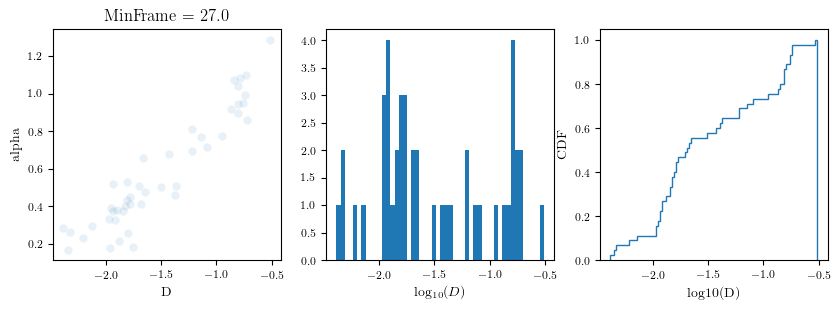

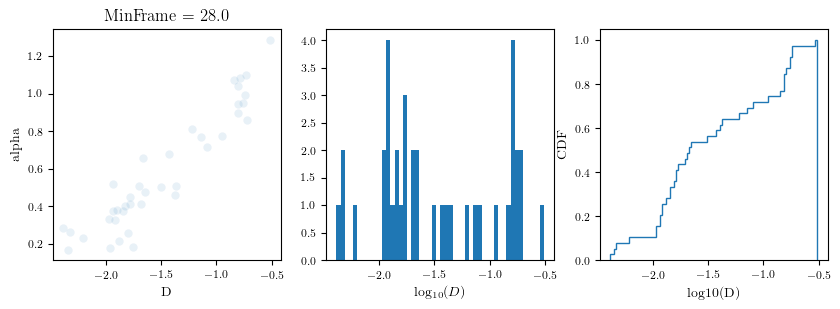

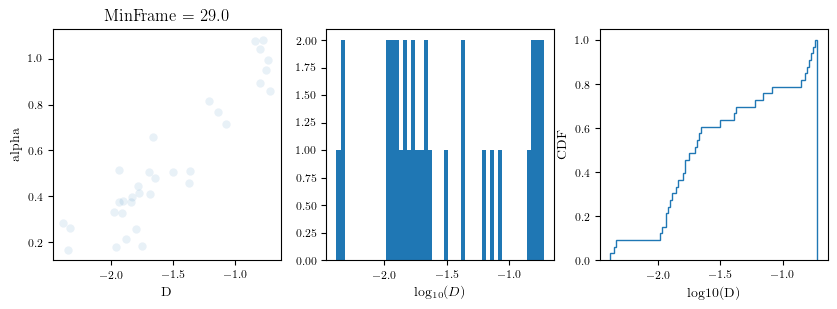

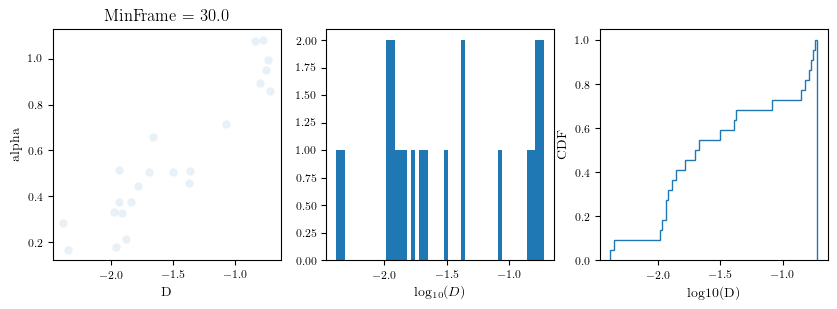

In [23]:
N = np.linspace(minframe,30,20)
for n in N:
    temp1 = data_stripped[(data_stripped['N']>n) & (data_stripped['R2']>0.5)]
    fig, ax = plt.subplots(1,3,figsize=(10,3))
    
    sns.scatterplot(x='D',y='alpha',data=temp1,ax=ax[0],alpha=0.1)
    ax[0].set_title('MinFrame = '+str(round(n)))
    
    ax[1].hist(temp1['D'],bins=50)
    ax[1].set_xlabel(r'log$_{10}(D)$')
    
    ax[2].hist(temp1['D'],bins=100,density=True, histtype='step',cumulative=True)
    ax[2].set_ylabel('CDF')
    ax[2].set_xlabel('log10(D)')

    plt.show()

In [24]:
data_stripped = data_stripped[(data_stripped['N']>=15) & (data_stripped['R2']>0.5)]
display(data_stripped)

,alpha,D,c,R2,N,x,y,MSD,Filename,spotIDs,Label
17,1.064559,-0.852959,0.306757,0.739659,16,"[42.919, 42.773999999999994, 42.785, 42.893, 4...","[40.731, 40.641999999999996, 40.61, 40.7480000...","[0.023338866666667072, 0.047536785714286586, 0...",Data/SM1/tracks425.csv,"[310081, 313008, 311505, 315924, 314456, 32026...",nan
21,0.449328,-1.295587,0.014738,0.685844,16,"[7.957000000000001, 7.947, 7.959, 8.039, 8.089...","[41.405, 41.501000000000005, 41.665, 41.623000...","[0.050152466666667256, 0.08336378571428617, 0....",Data/SM1/tracks425.csv,"[308621, 310095, 313041, 311534, 315927, 31447...",nan
23,0.322985,-1.599480,0.069293,0.672410,17,"[39.826, 39.929, 39.62, 39.442, 39.52, 39.772,...","[30.846, 31.02, 31.19, 31.093000000000004, 30....","[0.032243312500000225, 0.05940566666666692, 0....",Data/SM1/tracks425.csv,"[308364, 309833, 312762, 311283, 315685, 31422...",nan
24,0.265991,-2.293990,0.102065,0.728758,17,"[41.482, 41.527, 41.599, 41.646, 41.644, 41.72...","[41.76, 41.81399999999999, 41.746, 41.73399999...","[0.008511874999999525, 0.013099799999999736, 0...",Data/SM1/tracks425.csv,"[308632, 310107, 313043, 311539, 315949, 31448...",nan
33,0.442577,-1.330613,0.133063,0.713191,15,"[26.701, 26.688000000000002, 26.775, 26.941999...","[4.933, 4.835, 5.083, 5.008, 5.189, 5.14, 5.33...","[0.05596228571428544, 0.05178830769230731, 0.0...",Data/SM1/tracks425.csv,"[319480, 316524, 318038, 320950, 323893, 32241...",nan
...,...,...,...,...,...,...,...,...,...,...,...
8231,0.375738,-2.065600,0.230037,0.687583,19,"[49.16, 49.121, 49.103, 49.148, 49.07199999999...","[29.95, 29.988000000000003, 29.901, 29.926, 29...","[0.010703444444444899, 0.016312117647059473, 0...",Data/SM10/tracks425.csv,"[5428074, 5432017, 5430686, 5433368, 5436028, ...",nan
8241,0.745596,-1.144799,0.137727,0.815193,20,"[12.564, 12.584000000000001, 12.48599999999999...","[64.085, 64.12100000000001, 64.245, 64.485, 64...","[0.030380368421052194, 0.04894522222222196, 0....",Data/SM10/tracks425.csv,"[5453439, 5448297, 5449944, 5454699, 5457283, ...",nan
8247,0.536904,-1.690335,0.046710,0.624196,23,"[17.06, 17.17, 17.169, 17.156, 17.142, 17.235,...","[14.117, 14.357999999999999, 14.337, 14.362, 1...","[0.016054818181818267, 0.02307823809523819, 0....",Data/SM10/tracks425.csv,"[5466661, 5469247, 5471852, 5467910, 5470545, ...",nan
8289,0.321072,-2.222646,0.201521,0.509935,22,"[13.979000000000001, 13.975999999999999, 14.18...","[63.801, 63.715, 63.492, 63.488, 63.4430000000...","[0.007581285714285745, 0.014006950000000157, 0...",Data/SM10/tracks425.csv,"[5632175, 5632381, 5634846, 5636004, 5637229, ...",nan


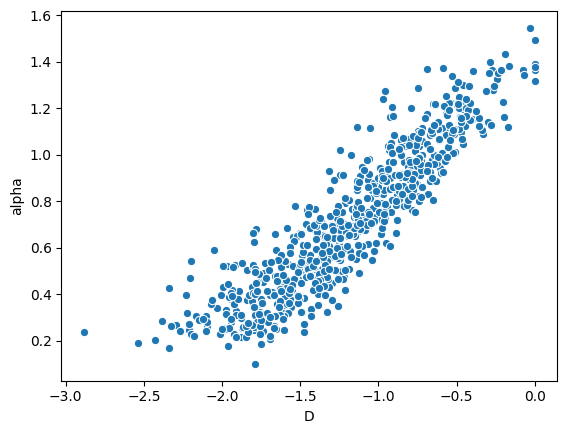

693


In [25]:
mpl.rcParams.update(mpl.rcParamsDefault)
sns.scatterplot(x='D',y='alpha',data=data_stripped)
plt.show()

MSD0 = list(data_stripped['MSD'].values)
print(len(MSD0))

#############################################
############## PROGRAM MICHALET #############
#############################################
Compute the TE-MSD and ensemble variance...
Number of T-MSDs at time lag  0.05  =  693
Number of T-MSDs at time lag  0.1  =  693
Number of T-MSDs at time lag  0.15  =  693
Number of T-MSDs at time lag  0.2  =  693
Number of T-MSDs at time lag  0.25  =  693
Number of T-MSDs at time lag  0.3  =  693
Number of T-MSDs at time lag  0.35  =  693
Number of T-MSDs at time lag  0.4  =  693
Number of T-MSDs at time lag  0.45  =  693
Number of T-MSDs at time lag  0.5  =  693
Number of T-MSDs at time lag  0.55  =  693
Number of T-MSDs at time lag  0.6  =  693
Number of T-MSDs at time lag  0.65  =  693
Number of T-MSDs at time lag  0.7  =  693
Number of T-MSDs at time lag  0.75  =  515
Number of T-MSDs at time lag  0.8  =  409
Number of T-MSDs at time lag  0.85  =  319
Number of T-MSDs at time lag  0.9  =  254
Number of T-MSDs at time lag  0.95  =  206
Number of 

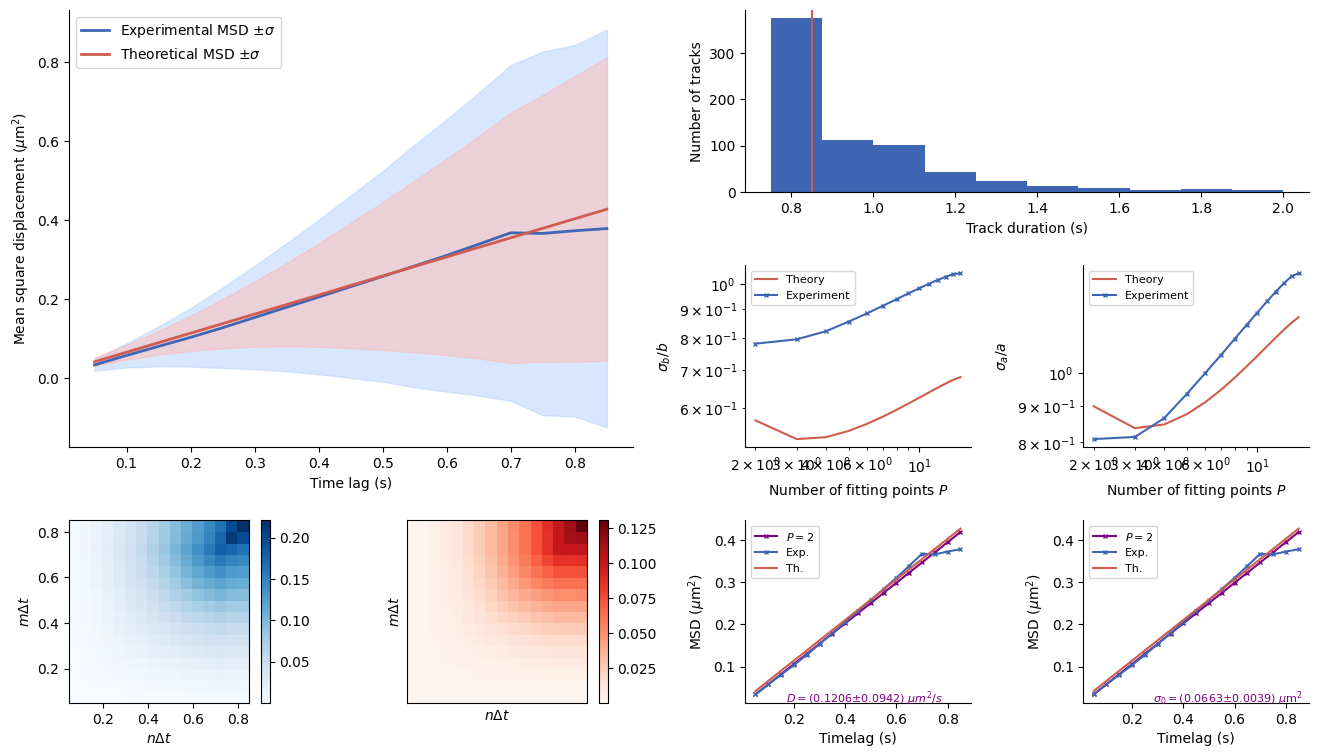

/home/remy13127/Documents/Internship/Functions/functions.py:1039: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


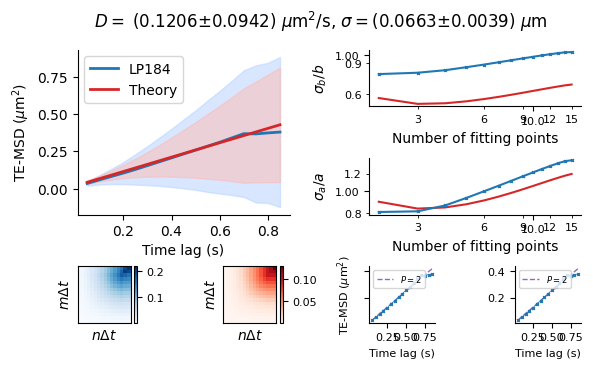

In [26]:
Michalet(MSD0,cutoff=0.85,experiment_name=r'LP184')
plt.savefig('Results/michalet_lp184_rs425.pdf',bbox_inches = 'tight')
plt.show()

/home/remy13127/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


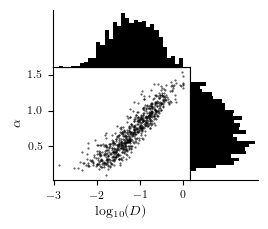

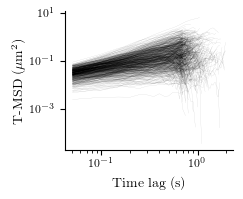

Compute the TE-MSD and ensemble variance...


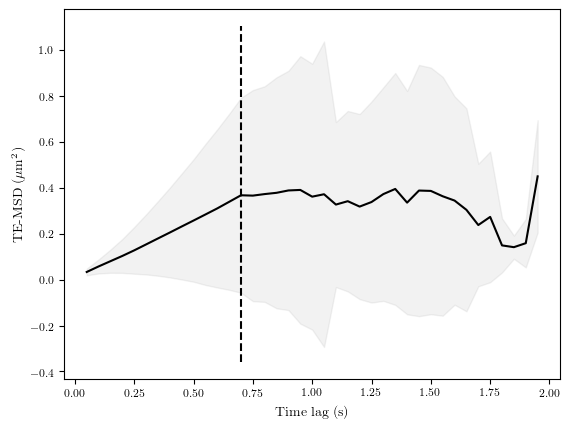

You have set a cutoff at  0.7  s...
Done. The TE-MSD and associated variance have been generated.


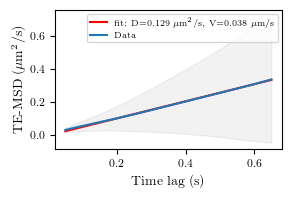

Compute the TE-MSD and ensemble variance...


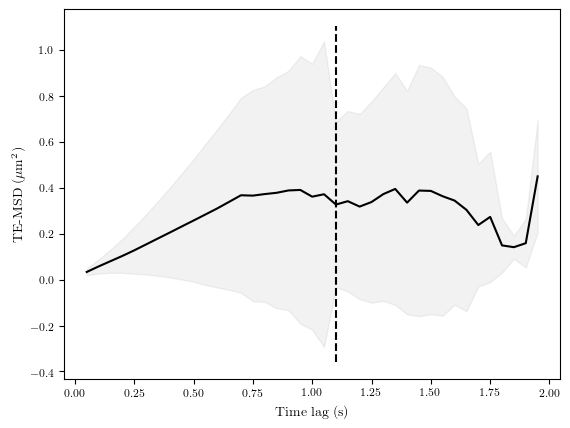

You have set a cutoff at  1.1  s...
Done. The TE-MSD and associated variance have been generated.
[0.033669396867853585, 0.05778928129282052, 0.08067714813382422, 0.10350740363882098, 0.1278021659953889, 0.15367284071868764, 0.1796641693501249, 0.20547829765817086, 0.23177528586295373, 0.2577474814981458, 0.28410119526235494, 0.31065083571867697, 0.3392431105919367, 0.3679703286162414, 0.3664154558568272, 0.37315150901340965, 0.3786768218713694, 0.388956987548137, 0.3911748683885675, 0.3618825244280412, 0.3723963966043167, 0.32742120495910615]


In [27]:
# the random data
logD = list(data_stripped['D'].values)
alpha = list(data_stripped['alpha'].values)
binsize=30

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.55))
grid = plt.GridSpec(3, 3, wspace=0., hspace=0.,right=0.7)
scatter = fig.add_subplot(grid[1:3, 0:2])
hist_logD = fig.add_subplot(grid[0,0:2],yticks=[],xticks=[])
hist_alpha = fig.add_subplot(grid[1:3,2],yticks=[],xticks=[])

scatter.scatter(logD,alpha,s=0.2,c='k',alpha=0.8)
scatter.set_xlabel(r'log$_{10}(D)$')
scatter.set_ylabel(r'$\alpha$')

hist_logD.hist(logD,bins=binsize,color='k')
hist_logD.spines['top'].set_visible(False)
hist_logD.spines['right'].set_visible(False)


hist_alpha.hist(alpha,bins=binsize,color='k',orientation='horizontal')
hist_alpha.spines['top'].set_visible(False)
hist_alpha.spines['right'].set_visible(False)

plt.tight_layout()
plt.savefig('Results/scatter_rs425_lp184.pdf',bbox_inches = 'tight')
plt.show()

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0., hspace=0.,right=0.7)
ax = fig.add_subplot(grid[0,0])
MSDSeries = list(data_stripped['MSD'].values)
for msd in MSDSeries:
    timelag = np.linspace(dt,len(msd)*dt,len(msd))
    ax.plot(timelag,msd,c='k',alpha=0.3,linewidth=0.1)
ax.set_xscale('log')
ax.set_yscale('log')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.set_xlabel('Time lag (s)')
ax.set_ylabel(r'T-MSD ($\mu$m$^2$)')
plt.savefig('Results/msd_rs425_lp184.pdf',bbox_inches = 'tight')
plt.show()

MSDtot = list(data_stripped['MSD'].values)
temsdtot,vartot,timelagtot = TE_MSD(MSDtot,cutoff=0.70,plot=True)

from scipy.optimize import curve_fit
def drift_model(timelag, D, V):
    return(4*D*timelag+(V**2)*(timelag**2))

popt, pcov = curve_fit(drift_model, timelagtot, temsdtot)

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0.8, hspace=0.8)
ax = fig.add_subplot(grid[0,0])
ax.plot(timelagtot, drift_model(timelagtot, *popt), 'r-',label=r'fit: D=%5.3f $\mu$m$^2/$s, V=%5.3f $\mu$m/s' % tuple(popt))
ax.plot(timelagtot,temsdtot,label='Data')
ax.fill_between(timelagtot,[msd+np.sqrt(var) for msd,var in zip(temsdtot,vartot)], [msd-np.sqrt(var) for msd,var in zip(temsdtot,vartot)],color='gray',alpha=0.1)
#ax.set_xlim(0.05,30)
ax.set_xlabel('Time lag (s)')
ax.set_ylabel(r'TE-MSD ($\mu$m$^2/$s)')
plt.legend(fontsize=6)
#fig.savefig('Drift/Plots/drift_movie_ensemble_msd_fit.pdf', format='pdf', bbox_inches='tight')
plt.show()
#Michalet(MSDfast,cutoff=1) #CAREFUL THIS IS SLOW DUE TO THE VERY LONG TRACKS

MSDtot = list(data_stripped['MSD'].values)
temsd,var,timelag = TE_MSD(MSDtot,cutoff=1.1,plot=True)
print(temsd)

30 30
[0.10005052]


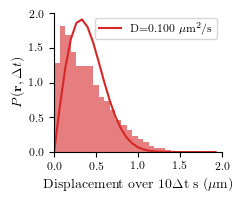

In [28]:
Xtot = list(data_stripped['x'].values)
Ytot = list(data_stripped['y'].values)


def plot_dist(X,Y,n,binsize=30,color='tab:blue'):
    displacements = []
    epsilon=0.
    s = 0
    for x,y in zip(X,Y):
        for i in range(0,len(x)-n):
            disp = np.sqrt((x[n+i] - x[i])**2 + (y[n+i] - y[i])**2)
            displacements.append(disp)

    from scipy.optimize import curve_fit
    def prob(d,D):
        timelag=dt*n
        return(2*d/(4*D*timelag+epsilon)*np.exp(-d**2/(4*D*timelag+epsilon)))

    histo,bins = np.histogram(displacements,bins=binsize,density=True)
    print(len(histo),len(bins[:-1]))
    popt, pcov = curve_fit(prob, bins[:-1], histo)
    print(popt)
    plt.plot(bins[:-1], prob(bins[:-1], *popt), 'r-',label=r'D=%5.3f $\mu$m$^2/$s' % tuple(popt),c=color)
    plt.hist(displacements,bins=binsize,density=True,color=color,alpha=0.6)

mpl.rcParams.update(mpl.rcParamsDefault)
plt.style.use('tex')
width = 469.75502
fig= plt.figure(figsize=set_size(width, fraction=0.45))
grid = plt.GridSpec(1, 1, wspace=0., hspace=0.,right=0.7)
ax = fig.add_subplot(grid[0,0])
n=10
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
plot_dist(Xtot,Ytot,n,color='tab:red',binsize=30)
ax.set_xlabel(r'Displacement over '+str(n)+'$\Delta$t s ($\mu$m)')
ax.set_ylabel(r'$P(\mathbf{r},\Delta t)$')
ax.set_xlim(0,2)
ax.legend()
plt.savefig('Results/lp184_rs425_displacement'+str(n)+'.pdf',bbox_inches = 'tight')
plt.show()